## Pré-processamento de dados  - Breast Cancer dataset

* https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('breast_cancer_missing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                569 non-null    int64  
 1   mean_radius              527 non-null    float64
 2   mean_texture             521 non-null    float64
 3   mean_perimeter           508 non-null    float64
 4   mean_area                502 non-null    float64
 5   mean_smoothness          523 non-null    float64
 6   mean_compactness         510 non-null    float64
 7   mean_concavity           502 non-null    float64
 8   mean_concave_points      514 non-null    float64
 9   mean_symmetry            519 non-null    float64
 10  mean_fractal_dimension   513 non-null    float64
 11  radius_error             511 non-null    float64
 12  texture_error            513 non-null    float64
 13  perimeter_error          505 non-null    float64
 14  area_error               5

## 1) Agrupamento e Amostragem

In [4]:
# Amostragem aleatoria
df.sample(4)

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,842302,17.990,10.38,122.80,NaN,0.11840,0.27760,0.30010,0.147100,NaN,...,17.33,184.60,2019.0,0.1622,0.6656,NaN,0.26540,0.4601,0.1189,malignant
114,864496,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.019240,NaN,...,19.62,64.48,284.4,NaN,0.2364,0.24560,0.10500,NaN,0.1017,benign
335,89742801,17.060,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.099340,0.1727,...,NaN,143.20,1362.0,0.1449,0.2053,0.39200,0.18270,0.2623,NaN,malignant
442,90944601,13.780,15.79,88.37,585.9,0.08817,NaN,0.01055,0.009937,NaN,...,17.50,97.90,706.6,0.1072,0.1071,0.03517,0.03312,NaN,0.0681,benign


In [5]:
# Amostra com quantidades iguais por classe
# 4 amostras aleatórias por classe
# group_keys=False
# df.groupby('diagnosis', group_keys=False).apply(lambda x: x.sample(4))
df.groupby('diagnosis',group_keys=False).sample(4)

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
429,90769602,12.72,17.67,80.98,501.3,0.07896,0.04522,0.014020,0.018350,0.1459,...,20.96,88.87,NaN,0.1068,0.09605,0.03469,NaN,0.2165,0.06025,benign
185,874158,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,...,21.18,75.39,NaN,0.1521,0.10190,0.00692,0.01042,0.2933,0.07697,benign
513,915940,14.58,13.66,94.29,658.8,0.09832,0.08918,0.082220,0.043490,0.1739,...,NaN,NaN,862.0,0.1223,0.19280,0.24920,NaN,0.2626,0.07048,benign
511,915664,14.81,14.70,94.66,680.7,0.08472,NaN,0.034160,0.025410,0.1659,...,17.58,101.70,760.2,0.1139,0.10110,0.11010,0.07955,0.2334,NaN,benign
535,919555,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.208500,0.132200,0.2127,...,25.48,NaN,1809.0,0.1268,0.31350,0.44330,0.21480,0.3077,0.07569,malignant
353,9010018,NaN,25.74,98.00,716.6,NaN,0.09769,0.123500,0.065530,0.1647,...,33.22,121.20,NaN,0.1660,0.23560,0.40290,0.15260,0.2654,0.09438,malignant
0,842302,17.99,10.38,122.80,NaN,0.11840,0.27760,0.300100,0.147100,NaN,...,17.33,184.60,2019.0,0.1622,0.66560,NaN,0.26540,0.4601,0.11890,malignant
126,866083,13.61,24.69,87.76,572.6,0.09258,0.07862,NaN,0.030850,0.1761,...,35.64,113.20,848.7,0.1471,0.28840,0.37960,0.13290,0.3470,0.07900,malignant


In [6]:
print(df['diagnosis'].value_counts())

diagnosis
benign       316
malignant    189
Name: count, dtype: int64


In [7]:
print((df['diagnosis'].value_counts()) / len(df) * 100)

diagnosis
benign       55.536028
malignant    33.216169
Name: count, dtype: float64


In [8]:
# Amostragem Proporcional (Estratificada)
# Exemplo baseado em 60% das amostras
df.groupby('diagnosis',group_keys=False)['diagnosis'].sample(frac=0.6).value_counts()

diagnosis
benign       190
malignant    113
Name: count, dtype: int64

In [9]:
df.groupby('diagnosis', as_index=False)[['mean_area', 'worst_area']].agg(['mean','std'])

diagnosis   mean_area               worst_area            
                    mean         std         mean         std
0     benign  464.033684  134.705060   557.475524  162.800566
1  malignant  990.943558  367.001705  1440.750303  595.849372

## 2) Limpeza dos Dados

### Dados Faltantes

Missing Data ou Missing Values são valores ausentes mostrados como NaN que significa "Not a Number"

#### A sintaxe Python usada:

- Para selecionar NaN: pd.isnull()
- Para substituir valores NaN: df.fillna()
- Para substituir NaN pela média: df.fillna(df.mean(), inplace=True)
- Para substituir valores presentes por outros valores: `pd.replace("valor","novo_valor")
- Para remover os registros NaN: df.dropna(inplace=True)

In [10]:
df.isnull().sum()

sample_id                   0
mean_radius                42
mean_texture               48
mean_perimeter             61
mean_area                  67
mean_smoothness            46
mean_compactness           59
mean_concavity             67
mean_concave_points        55
mean_symmetry              50
mean_fractal_dimension     56
radius_error               58
texture_error              56
perimeter_error            64
area_error                 60
smoothness_error           54
compactness_error          60
concavity_error            59
concave_points_error       45
symmetry_error             58
fractal_dimension_error    52
worst_radius               47
worst_texture              58
worst_perimeter            66
worst_area                 60
worst_smoothness           63
worst_compactness          53
worst_concavity            50
worst_concave_points       52
worst_symmetry             59
worst_fractal_dimension    75
diagnosis                  64
dtype: int64

In [11]:
df['diagnosis'].isnull().sum()

64

In [12]:
#Remove os dados faltantes em diagnosis
df.dropna(subset=['diagnosis'],inplace=True)

In [13]:
df['diagnosis'].isnull().sum()

0

In [16]:
# Obtem o nome das colunas com NaN
# Deixa no formato list
nan_columns = df.columns[df.isna().any()].tolist()
print(f"{nan_columns}")

['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'radius_error', 'texture_error', 'perimeter_error', 'area_error', 'smoothness_error', 'compactness_error', 'concavity_error', 'concave_points_error', 'symmetry_error', 'fractal_dimension_error', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']


In [17]:
# Percorre cada coluna calculando a média
# Substitui todos os NaN pela média
for col in nan_columns:
  media = df[col].mean()
  print(media)
  df[col].fillna(media, inplace=True)

14.199702355460387
19.27627155172414
92.82754966887418
655.7441964285715
0.09656095032397409
0.10429558758314857
0.09061060135135138
0.05012960352422907
0.18145119305856833
0.06304136563876651
0.4074896929824561
1.205546799116998
2.9253336283185836
40.40882926829268
0.007074840611353712
0.026135179600886918
0.032873957743362825
0.012027144708423324
0.020362975770925107
0.003854444857768052
16.408450216450216
25.57175824175824
107.61477876106196
880.6248337028826
0.13211443458980043
0.25396089324618737
0.2738400715835141
0.11536521710526315
0.2903896247240618
0.08413929061784897


In [18]:
df.isnull().sum()

sample_id                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
diagnosis                  0
dtype: int64

In [19]:
df[nan_columns]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.990000,10.38,122.80,655.744196,0.1184,0.277600,0.300100,0.14710,0.181451,0.078710,...,25.38,17.33,184.60,2019.000000,0.162200,0.6656,0.27384,0.265400,0.46010,0.118900
2,19.690000,21.25,130.00,1203.000000,0.1096,0.104296,0.090611,0.12790,0.206900,0.059990,...,23.57,25.53,152.50,1709.000000,0.144400,0.4245,0.45040,0.243000,0.29039,0.087580
3,11.420000,20.38,77.58,386.100000,0.1425,0.283900,0.090611,0.10520,0.259700,0.097440,...,14.91,26.50,98.87,567.700000,0.209800,0.8663,0.68690,0.257500,0.66380,0.173000
4,20.290000,14.34,135.10,1297.000000,0.1003,0.132800,0.090611,0.10430,0.180900,0.058830,...,22.54,16.67,152.20,1575.000000,0.137400,0.2050,0.40000,0.162500,0.23640,0.076780
5,12.450000,15.70,82.57,477.100000,0.1278,0.170000,0.157800,0.08089,0.208700,0.076130,...,15.47,23.75,103.40,741.600000,0.179100,0.5249,0.53550,0.174100,0.39850,0.124400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,15.220000,30.62,103.40,655.744196,0.1048,0.208700,0.255000,0.09429,0.212800,0.063041,...,17.52,42.79,128.70,915.000000,0.141700,0.7917,1.17000,0.235600,0.40890,0.140900
563,20.920000,25.09,143.00,1347.000000,0.1099,0.223600,0.317400,0.14740,0.214900,0.068790,...,24.29,29.41,179.10,880.624834,0.132114,0.4186,0.65990,0.254200,0.29290,0.098730
564,21.560000,22.39,142.00,1479.000000,0.1110,0.115900,0.243900,0.13890,0.172600,0.056230,...,25.45,26.40,166.10,880.624834,0.141000,0.2113,0.41070,0.221600,0.20600,0.084139
565,20.130000,28.25,131.20,1261.000000,0.0978,0.103400,0.144000,0.09791,0.175200,0.055330,...,23.69,38.25,155.00,1731.000000,0.116600,0.1922,0.32150,0.115365,0.25720,0.066370


In [20]:
# Forma otimizada
df[nan_columns] = df[nan_columns].fillna('mean')
# df.fillna(df[nan_columns].mean(), inplace=True)

In [ ]:
df.isnull().sum()

sample_id                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
diagnosis                  0
dtype: int64

## 3) Normalização de atributos numéricos

A normalização por reescala define, através de um valor mínimo e um valor máximo, um novo intervalo onde os valores de um atributo estarão contidos. Tipicamente, tal intervalo é definido como [0, 1]. Portanto, para este caso, a normalização por reescala de um atributo $j$ de um objeto $x_i$ pode ser calculada como:

$$ x_{ij} = \frac{x_{ij} - min_j}{max_j - min_j} $$

sendo min_j e max_j , nessa ordem, os valores mínimo e máximo do atributo $j$ para o conjunto de dados considerado.

Na normalização por padronização, os diferentes atributos contínuos poderão abranger diferentes intervalos, mas deverão possuir os mesmos valores para alguma medida de posição e de espalhamento/variação.
Essas medidas irão consistir na média e no desvio-padrão. Neste caso, o valor normalizado de um atributo $j$
em um objeto $i$ é dado por:

$$ x_{ij} = \frac{x_{ij} - \bar{x}_j}{\sigma_j} $$

In [21]:
scaler_cols = df.columns[1:31]
print(scaler_cols)

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')


In [ ]:
df.head()

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,842302,17.99,10.38,122.80,655.744196,0.1184,0.277600,0.300100,0.14710,0.181451,...,17.33,184.60,2019.0,0.1622,0.6656,0.27384,0.2654,0.46010,0.11890,malignant
2,84300903,19.69,21.25,130.00,1203.000000,0.1096,0.104296,0.090611,0.12790,0.206900,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.2430,0.29039,0.08758,malignant
3,84348301,11.42,20.38,77.58,386.100000,0.1425,0.283900,0.090611,0.10520,0.259700,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.2575,0.66380,0.17300,malignant
4,84358402,20.29,14.34,135.10,1297.000000,0.1003,0.132800,0.090611,0.10430,0.180900,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.1625,0.23640,0.07678,malignant
5,843786,12.45,15.70,82.57,477.100000,0.1278,0.170000,0.157800,0.08089,0.208700,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.1741,0.39850,0.12440,malignant


In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
# ajuste = scaler.fit(df[scaler_cols])
# df[scaler_cols] = ajuste.transform(df[scaler_cols])

In [ ]:
df.head()

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,842302,17.99,10.38,122.80,655.744196,0.1184,0.277600,0.300100,0.14710,0.181451,...,17.33,184.60,2019.0,0.1622,0.6656,0.27384,0.2654,0.46010,0.11890,malignant
2,84300903,19.69,21.25,130.00,1203.000000,0.1096,0.104296,0.090611,0.12790,0.206900,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.2430,0.29039,0.08758,malignant
3,84348301,11.42,20.38,77.58,386.100000,0.1425,0.283900,0.090611,0.10520,0.259700,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.2575,0.66380,0.17300,malignant
4,84358402,20.29,14.34,135.10,1297.000000,0.1003,0.132800,0.090611,0.10430,0.180900,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.1625,0.23640,0.07678,malignant
5,843786,12.45,15.70,82.57,477.100000,0.1278,0.170000,0.157800,0.08089,0.208700,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.1741,0.39850,0.12440,malignant


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                505 non-null    int64  
 1   mean_radius              505 non-null    float64
 2   mean_texture             505 non-null    float64
 3   mean_perimeter           505 non-null    float64
 4   mean_area                505 non-null    float64
 5   mean_smoothness          505 non-null    float64
 6   mean_compactness         505 non-null    float64
 7   mean_concavity           505 non-null    float64
 8   mean_concave_points      505 non-null    float64
 9   mean_symmetry            505 non-null    float64
 10  mean_fractal_dimension   505 non-null    float64
 11  radius_error             505 non-null    float64
 12  texture_error            505 non-null    float64
 13  perimeter_error          505 non-null    float64
 14  area_error               5

## Modelos de Machine Learning

### Separação entre treino e teste

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
# Transforma os dados categóricos de diagnosis
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])

In [24]:
df['diagnosis'].value_counts()

diagnosis
0    316
1    189
Name: count, dtype: int64

In [ ]:
# Formato Numpy array
# X = df.drop(['diagnosis'], axis=1).values
# y = df['diagnosis'].values

In [25]:
# Formato dataframe e series
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Randon Forest

In [29]:
forest = RandomForestClassifier(n_estimators = 10000)

forest.fit(X_train, y_train)
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)

y_pred = forest.predict(X_test)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)

Training Score 1.0
Testing Score 
 0.9276315789473685


### Métricas

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

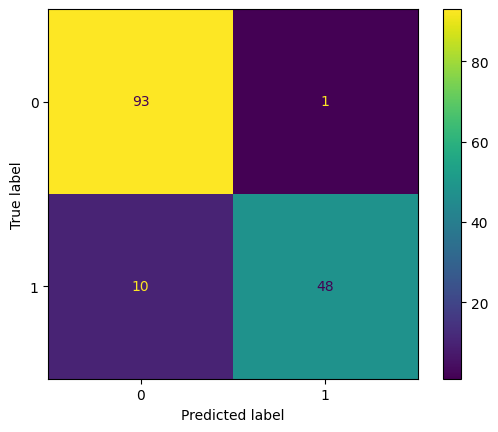

In [31]:
cm = confusion_matrix(y_test, y_pred)
# print(cm)
ConfusionMatrixDisplay(cm).plot()

In [32]:
df.columns

Index(['sample_id', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')

In [33]:
# Acuracidade
print("ACC: %.3f" %(accuracy_score(y_test,y_pred)))
#Revocação
print("Recall :%.2f" %(recall_score(y_test,y_pred)))
#Precisão
print("Precision :%.2f" %(precision_score(y_test,y_pred)))
#F1-score
print("F1-score :%.2f" %(f1_score(y_test,y_pred)))

ACC: 0.928
Recall :0.83
Precision :0.98
F1-score :0.90


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        94
           1       0.98      0.83      0.90        58

    accuracy                           0.93       152
   macro avg       0.94      0.91      0.92       152
weighted avg       0.93      0.93      0.93       152

